In [101]:

import random

def mh(p_star,param_init,num_samples=5000,stepsize=1.0):
    x = [param_init]
    dim = np.size(param_init)
    for t in range(num_samples):
        # Generate : Generate a candidate x ′ for the next sample by picking from the distribution g ( x ′ | x t ).
        x_prime = np.random.normal(x[-1], stepsize, dim)
        # Calculate : Calculate the acceptance ratio α = f ( x ′ ) / f ( x t ), which will be used to decide whether to accept or reject the candidate. Because f is proportional to the density of P, we have that α = p_star( x ′ ) / p_star( x t ) = P ( x ′ ) / P ( x t ).
        alpha = p_star(x_prime)/p_star(x[-1])
        # Accept or Reject :
            # Generate a uniform random number u  on [0,1].
            # If u ≤ α accept the candidate by setting x t + 1 = x ′,
            # If u > α reject the candidate and set x t + 1 = x t, instead.
        u = random.uniform(0, 1)
        if u <= alpha:
            x.append(x_prime)
        else:
            x.append(x[-1])
    return x

In [102]:
print(random.uniform(0,1))

0.11683552274381648


In [103]:
import scipy.stats
import numpy as np
import matplotlib.pyplot as plt
x = lambda a : scipy.stats.norm(0, 1).pdf(a[0])*scipy.stats.norm(0, 1).pdf(a[1])



In [98]:
s = mh(x, [0, 0])

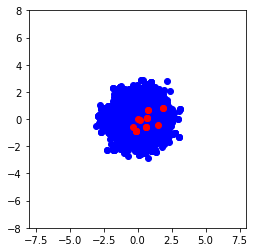

In [99]:
s = np.array(s)
plt.scatter(s[:, 0], s[:, 1], color='b')
plt.scatter(s[0:19, 0], s[0:19, 1], color='r')
plt.xlim(-8, 8)
plt.ylim(-8, 8)
plt.gca().set_aspect('equal', adjustable='box')
plt.draw()
plt.savefig('fig2a.pdf')

In [87]:
s = mh(x, [7, 7])


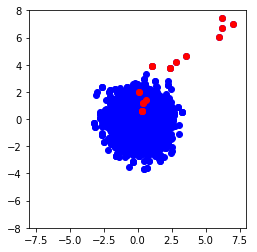

In [96]:
s = np.array(s)
plt.scatter(s[:, 0], s[:, 1], color='b')
plt.scatter(s[0:19, 0], s[0:19, 1], color='r')
plt.xlim(-8, 8)
plt.ylim(-8, 8)
plt.gca().set_aspect('equal', adjustable='box')
plt.savefig('fig2b.pdf')
plt.show()


In [106]:
def mh_w(p_star,param_init,w, num_samples=5000,stepsize=1.0):
    x = [param_init]
    dim = np.size(param_init)
    for t in range(num_samples+w):
        if t == w:
            x = [x[-1]]
        # Generate : Generate a candidate x ′ for the next sample by picking from the distribution g ( x ′ | x t ).
        x_prime = np.random.normal(x[-1], stepsize, dim)
        # Calculate : Calculate the acceptance ratio α = f ( x ′ ) / f ( x t ), which will be used to decide whether to accept or reject the candidate. Because f is proportional to the density of P, we have that α = p_star( x ′ ) / p_star( x t ) = P ( x ′ ) / P ( x t ).
        alpha = p_star(x_prime)/p_star(x[-1])
        # Accept or Reject :
            # Generate a uniform random number u  on [0,1].
            # If u ≤ α accept the candidate by setting x t + 1 = x ′,
            # If u > α reject the candidate and set x t + 1 = x t, instead.
        u = random.uniform(0, 1)
        if u <= alpha:
            x.append(x_prime)
        else:
            x.append(x[-1])
    return x

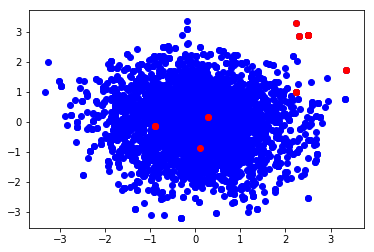

In [47]:
s = mh(x, [7, 7] ,w=20)
s = np.array(s)
plt.scatter(s[:, 0], s[:, 1], color='b')
plt.scatter(s[0:19, 0], s[0:19, 1], color='r')
#plt.xlim(-4, 4)
#plt.ylim(-4, 4)
#plt.gca().set_aspect('equal', adjustable='box')
plt.show()


In [112]:
print(np.mean(s[:,0]))
print(np.mean(s[:,1]))
#print(np.corrcoef(s[:,0]),s[:,1])

0.8748513343860045
-0.20296691198736305
1.0 [ 0.34912153  0.34912153  0.34912153 ... -0.68193878 -0.68193878
 -1.18731176]


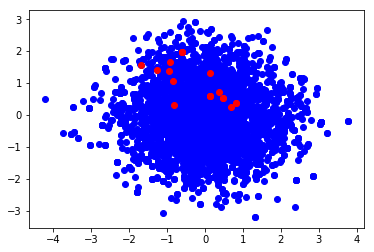

In [48]:
s = mh(x, [0, 0] ,w=20)
s = np.array(s)
plt.scatter(s[:, 0], s[:, 1], color='b')
plt.scatter(s[0:19, 0], s[0:19, 1], color='r')
#plt.xlim(-4, 4)
#plt.ylim(-4, 4)
#plt.gca().set_aspect('equal', adjustable='box')
plt.show()

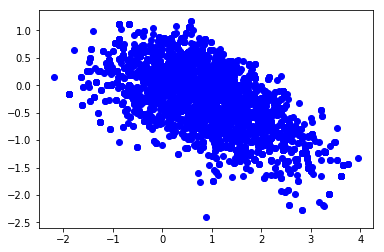

In [107]:
 


f = open("q3_poisson.txt", "r")
data = np.array(f.read().split(" ")).astype(np.float32)
x = data[:5]
y = data[5:]
p_target = lambda a : scipy.stats.norm(0, 100).pdf(a[0])*scipy.stats.norm(0, 100).pdf(a[1])*np.prod(scipy.stats.poisson.pmf(y,np.exp(a[0]*x+a[1])))
s = mh_w(p_target, [0, 0] ,w=1000)
s = np.array(s)
plt.scatter(s[:, 0], s[:, 1], color='b')
#plt.xlim(-4, 4)
#plt.ylim(-4, 4)
#plt.gca().set_aspect('equal', adjustable='box')
plt.savefig('fig3.pdf')
plt.show()

In [ ]:
print("fig1 has bigger variance than fig2 because in fig1 the samples generated are very different from the previous samples. second question: the variance in figc is even larger than figa because in figc we generate samples that have very small probability according to p*, due to very high variance of g so they are rejected. ")